In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import mir_utils as miru
import feature_functions as ff
import madmom as md
import librosa
import multiprocessing
import sounddevice as sd
import matplotlib.pyplot as plt
from PIL import Image
import os
sr=48000
df=miru.audioFrames(load=True)
save_dir="cnn_data"


(200, 50)
label                                              tom_low
path     ../dk_data/tom_low/Linn Linn-9000-MaxV - Tom L...
audio    [-0.000677282, -0.0019496031, -0.0102786245, -...
Name: 1683, dtype: object None


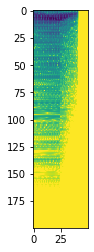

In [703]:
# this function a melspec from any 1 second audio 
# uncertainty: what's the best value for n_fft?
img_dim=200
# num_samples=2*img_dim**2-img_dim
num_samples=sr
def audToImage(x):
    xt,i=librosa.effects.trim(x, top_db=50)
    xt=librosa.util.normalize(xt)
    cut=xt[0:num_samples]
    cut=np.pad(cut,(0,num_samples-cut.shape[0]),'constant')
    D=librosa.stft(cut,n_fft=img_dim**2,hop_length=int(4*num_samples/img_dim)+1)
    S = librosa.feature.melspectrogram(S=D, sr=sr, n_mels=img_dim)
    S_dB = librosa.power_to_db(np.abs(S)**2)
    return S_dB

random_row = np.random.randint(df.shape[0])
audio_row = df.iloc[random_row]
z=audToImage(audio_row["audio"])
z=-1*librosa.util.normalize(z)
plt.imshow(z)
print(df.iloc[random_row],print(z.shape))


In [552]:
random_row = np.random.randint(df.shape[0])
audio_row = df.iloc[random_row]
audio_row

label                                                  rim
path                ../dk_data/rim/Alesis DM5-DM5Rim01.wav
audio    [-0.0020827183, -0.011676992, -0.013924917, -0...
Name: 401, dtype: object

In [21]:
#make directoies
folders=df.label.unique()
for f in folders:
    directory="./%s/%s/%s"%(save_dir,"train",f)
    if not os.path.exists(directory):
        os.makedirs(directory)
    directory="./%s/%s/%s"%(save_dir,"test",f)
    if not os.path.exists(directory):
        os.makedirs(directory)

In [492]:
#convert all audio in dataframe to images and put them in folders depending on the labels
df = df.sample(frac=1).reset_index(drop=True) #shuffling
trainPercent=0.9
testPercent=0.1
data_type="train"

for i,r in df.iterrows():
    fname=r["path"].split("/")[-1]
    if i>int(trainPercent*df.shape[0]):
        data_type="test"
    p="./%s/%s/%s/%s.png"%(save_dir,data_type,r["label"],fname)
    I=np.asarray(audToImage(r["audio"]))
    I8 = (((I - I.min()) / (I.max() - I.min())) * 255.9).astype(np.uint8)
    img = Image.fromarray(I8)
    img.save(p)